In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import *
import pyspark.sql.functions as func

# Part - 1 - Combining Datasets

### 1.1 - Loading Income Dataset

In [2]:
full_income = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("s3://gokulproject/Other_data/IncomeDataset.csv")
full_income.printSchema()

root
 |-- id: integer (nullable = true)
 |-- State_Code: integer (nullable = true)
 |-- State_Name: string (nullable = true)
 |-- State_ab: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Place: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Primary: string (nullable = true)
 |-- Zip_Code: integer (nullable = true)
 |-- Area_Code: string (nullable = true)
 |-- ALand: long (nullable = true)
 |-- AWater: long (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Mean_Household_Income: integer (nullable = true)
 |-- Median_HouseHold_Income: integer (nullable = true)
 |-- Stdev: integer (nullable = true)
 |-- NumHouseholds: double (nullable = true)

In [3]:
income = full_income.select(col("State_ab").alias('Inc_State'), col("Zip_Code"), col("Mean_Household_Income"), col("Median_Household_Income"), col("NumHouseholds"))
income = income.withColumn("Inc_Zip", income.Zip_Code.substr(1,3))
income.printSchema()

root
 |-- Inc_State: string (nullable = true)
 |-- Zip_Code: integer (nullable = true)
 |-- Mean_Household_Income: integer (nullable = true)
 |-- Median_Household_Income: integer (nullable = true)
 |-- NumHouseholds: double (nullable = true)
 |-- Inc_Zip: string (nullable = true)

In [4]:
income.show()

+---------+--------+---------------------+-----------------------+-------------+-------+
|Inc_State|Zip_Code|Mean_Household_Income|Median_Household_Income|NumHouseholds|Inc_Zip|
+---------+--------+---------------------+-----------------------+-------------+-------+
|       AL|   36611|                38773|                  30506|  1638.260513|    366|
|       AL|   36048|                37725|                  19528|  258.0176847|    360|
|       AL|   35051|                54606|                  31930|  926.0309998|    350|
|       AL|   36572|                63919|                  52814|  378.1146191|    365|
|       AL|   36528|                77948|                  67225|  282.3203278|    365|
|       AL|   35057|                50715|                  42643|  173.3259586|    350|
|       AL|   36426|                33737|                  23610|  758.7713224|    364|
|       AL|   36020|                46319|                  40242|  397.0525642|    360|
|       AL|   35621| 

In [5]:
income.createOrReplaceTempView("IncomeData")

In [6]:
income_data = spark.sql("select sum(Mean_Household_Income) as Tot_Mean_Income, \
sum(Median_Household_Income) as Tot_Med_Income, \
SUM(NumHouseholds) as NumHouseholds, \
Inc_State, Inc_Zip \
from IncomeData \
group by Inc_State, Inc_Zip")
income_data.printSchema()

root
 |-- Tot_Mean_Income: long (nullable = true)
 |-- Tot_Med_Income: long (nullable = true)
 |-- NumHouseholds: double (nullable = true)
 |-- Inc_State: string (nullable = true)
 |-- Inc_Zip: string (nullable = true)

### 1.2. Loading Education Dataset

In [7]:
full_education = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("s3://gokulproject/Other_data/EducationDataset.csv")
full_education.printSchema()

root
 |-- PRIMARY_KEY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- ENROLL: double (nullable = true)
 |-- TOTAL_REVENUE: double (nullable = true)
 |-- FEDERAL_REVENUE: double (nullable = true)
 |-- STATE_REVENUE: double (nullable = true)
 |-- LOCAL_REVENUE: double (nullable = true)
 |-- TOTAL_EXPENDITURE: double (nullable = true)
 |-- INSTRUCTION_EXPENDITURE: double (nullable = true)
 |-- SUPPORT_SERVICES_EXPENDITURE: double (nullable = true)
 |-- OTHER_EXPENDITURE: double (nullable = true)
 |-- CAPITAL_OUTLAY_EXPENDITURE: double (nullable = true)
 |-- GRADES_PK_G: double (nullable = true)
 |-- GRADES_KG_G: double (nullable = true)
 |-- GRADES_4_G: double (nullable = true)
 |-- GRADES_8_G: double (nullable = true)
 |-- GRADES_12_G: double (nullable = true)
 |-- GRADES_1_8_G: double (nullable = true)
 |-- GRADES_9_12_G: double (nullable = true)
 |-- GRADES_ALL_G: double (nullable = true)
 |-- AVG_MATH_4_SCORE: double (nullable =

In [8]:
education = full_education.select(col('STATE').alias('State'), col('STATE_REVENUE').alias('State_Educ_Revenue'), col('GRADES_ALL_G').alias('NumStudents'))
education.printSchema()

root
 |-- State: string (nullable = true)
 |-- State_Educ_Revenue: double (nullable = true)
 |-- NumStudents: double (nullable = true)

In [9]:
education.createOrReplaceTempView("EducationData")

In [10]:
educ_data = spark.sql("select State, sum(NumStudents) as NumStudents, \
sum(State_Educ_Revenue) as Tot_State_Educ_Revenue \
from EducationData group by State")
educ_data.printSchema()

root
 |-- State: string (nullable = true)
 |-- NumStudents: double (nullable = true)
 |-- Tot_State_Educ_Revenue: double (nullable = true)

In [11]:
educ_data.show()

+--------------------+-----------+----------------------+
|               State|NumStudents|Tot_State_Educ_Revenue|
+--------------------+-----------+----------------------+
|      SOUTH_CAROLINA| 1.547483E7|           7.0745597E7|
|        DOD_OVERSEAS|   438979.0|                  null|
|           WISCONSIN|1.9460842E7|          1.10117605E8|
|DISTRICT_OF_COLUMBIA|  1673688.0|                   0.0|
|   NORTHERN_MARIANAS|   139073.0|                  null|
|        PENNSYLVANIA|3.9643588E7|          1.88960285E8|
|            ILLINOIS|4.5100706E7|          1.79809932E8|
|            MARYLAND| 1.864524E7|           9.8826436E7|
|               IDAHO|  5784834.0|           2.5820605E7|
|            MISSOURI|2.0061151E7|           8.3661928E7|
|NORTHERN_MARIANA_...|    30393.0|                  null|
|            NEW_YORK|5.9646734E7|          4.46777506E8|
|             MONTANA|  3354134.0|           1.5196139E7|
|      VIRGIN_ISLANDS|       null|                  null|
|            M

### 1.3 Converting State into abbrevations using another dataset

In [12]:
states = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("s3://gokulproject/Other_data/states.csv")
states.printSchema()

root
 |-- State: string (nullable = true)
 |-- Abbreviation: string (nullable = true)

In [13]:
from pyspark.sql.functions import lower, upper
states = states.withColumn('State', upper(col('State')))


In [14]:
states.show()

+--------------------+------------+
|               State|Abbreviation|
+--------------------+------------+
|             ALABAMA|          AL|
|              ALASKA|          AK|
|             ARIZONA|          AZ|
|            ARKANSAS|          AR|
|          CALIFORNIA|          CA|
|            COLORADO|          CO|
|         CONNECTICUT|          CT|
|            DELAWARE|          DE|
|DISTRICT_OF_COLUMBIA|          DC|
|             FLORIDA|          FL|
|             GEORGIA|          GA|
|              HAWAII|          HI|
|               IDAHO|          ID|
|            ILLINOIS|          IL|
|             INDIANA|          IN|
|                IOWA|          IA|
|              KANSAS|          KS|
|            KENTUCKY|          KY|
|           LOUISIANA|          LA|
|               MAINE|          ME|
+--------------------+------------+
only showing top 20 rows

In [15]:
EducData_final = educ_data.join(states,"State", how='inner')
EducData_final = EducData_final.drop('State')
EducData_final = EducData_final.withColumnRenamed("Abbreviation", "state")
EducData_final.show()

+-----------+----------------------+-----+
|NumStudents|Tot_State_Educ_Revenue|state|
+-----------+----------------------+-----+
| 1.547483E7|           7.0745597E7|   SC|
|1.9460842E7|          1.10117605E8|   WI|
|  1673688.0|                   0.0|   DC|
|3.9643588E7|          1.88960285E8|   PA|
|4.5100706E7|          1.79809932E8|   IL|
| 1.864524E7|           9.8826436E7|   MD|
|  5784834.0|           2.5820605E7|   ID|
|2.0061151E7|           8.3661928E7|   MO|
|5.9646734E7|          4.46777506E8|   NY|
|  3354134.0|           1.5196139E7|   MT|
|  3.58826E7|          2.32956123E8|   MI|
|5.5298947E7|          2.18933074E8|   FL|
|1.1815272E7|           6.2709544E7|   OR|
|3.0015324E7|          1.54477379E8|   NC|
|  2910185.0|           2.6742962E7|   AK|
|1.6038502E7|           6.8490629E7|   LA|
|  4428573.0|           2.1842658E7|   ME|
| 2.787006E7|          1.96224231E8|   NJ|
|  1.40915E7|           5.8306836E7|   OK|
|2.6046432E7|          1.22374713E8|   VA|
+----------

## 1.4 Loading Customer data set 
### Created a Hive Script and External table already in Hive 

In [17]:
spark.sql("use cust_complains")
spark.sql("show tables").show()

+--------------+--------------------+-----------+
|      database|           tableName|isTemporary|
+--------------+--------------------+-----------+
|cust_complains| cust_complaints_all|      false|
|cust_complains|cust_complaints_a...|      false|
|              |       educationdata|       true|
|              |          incomedata|       true|
+--------------+--------------------+-----------+

In [18]:
customer = spark.sql("select * from cust_complaints_all")
customer.printSchema()

root
 |-- date_received: string (nullable = true)
 |-- product: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- consumer_complaint_narrative: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- timely_response: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- complaint_id: string (nullable = true)

In [19]:
customer = customer.join(EducData_final, "state", how="left")
customer.printSchema()

root
 |-- state: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- product: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- consumer_complaint_narrative: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- timely_response: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- NumStudents: double (nullable = true)
 |-- Tot_State_Educ_Revenue: double (nullable = true)

In [20]:
customer = customer.withColumn("zip", customer.zip_code.substr(1,3))
customer.printSchema()

root
 |-- state: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- product: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- consumer_complaint_narrative: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- timely_response: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- NumStudents: double (nullable = true)
 |-- Tot_State_Educ_Revenue: double (nullable = true)
 |-- zip: string (nullable = true)

In [21]:
#Merging Income with State and Zip 
customer = customer.join(income_data,(customer.state==income_data.Inc_State)&(customer.zip==income_data.Inc_Zip),
                          how="left")

In [22]:
customer = customer.drop('Inc_State').drop('Inc_Zip')
customer.printSchema()

root
 |-- state: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- product: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- consumer_complaint_narrative: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- timely_response: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- NumStudents: double (nullable = true)
 |-- Tot_State_Educ_Revenue: double (nullable = true)
 |-- zip: string (nullable = true)
 |-- Tot_Mean_Income: long (nullable = true)
 |--

In [23]:
customer.createOrReplaceTempView("FinalData")

In [25]:
customer.write.parquet("s3://gokulproject/Merged_Data.pq")

# Part 2 - Dataset Description

## 2. Importing Data From the Parquet File

In [1]:
data = spark.read.format("parquet")\
.option("nullValue", "")\
.load("s3://gokulproject/Merged_Data.pq/")
data.printSchema()
data.cache()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1557199152273_0002,pyspark3,idle,Link,Link,✔


SparkSession available as 'spark'.
root
 |-- state: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- product: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- consumer_complaint_narrative: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- timely_response: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- NumStudents: double (nullable = true)
 |-- Tot_State_Educ_Revenue: double (nullable = true)
 |-- zip: string (nullable = true)
 |-- Tot_Mean_

In [3]:
#Describing the dataset - number of records and columns.. 
print("Total number of records in the dataset is: "+str(data.count()))
print("Total number of columns in the dataset is: "+str(len(data.columns)))

Total number of records in the dataset is: 1256552
Total number of columns in the dataset is: 24

## Handling Missing Values

In [3]:
data_filled = data.na.fill(0)

In [4]:
items = data_filled.columns
print("Number of missing values in each column in the dataset is: "+'\n')
newcols =[]
for item in items:
    count = data_filled.filter((data_filled[item] == "") | data_filled[item].isNull() 
                                | isnan(data_filled[item])).count()
    print(" " +item+ "  -------->  " +str(count))
    if(count > 0):
        newcols.append(item)

Number of missing values in each column in the dataset is: 

 state  -------->  18321
 date_received  -------->  0
 product  -------->  0
 sub_product  -------->  235166
 issue  -------->  0
 sub_issue  -------->  527631
 consumer_complaint_narrative  -------->  878057
 company_public_response  -------->  820539
 company  -------->  0
 zip_code  -------->  111426
 tags  -------->  1084568
 consumer_consent_provided  -------->  23095
 submitted_via  -------->  0
 date_sent_to_company  -------->  0
 company_response  -------->  6
 timely_response  -------->  0
 consumer_disputed  -------->  0
 complaint_id  -------->  0
 NumStudents  -------->  0
 Tot_State_Educ_Revenue  -------->  0
 zip  -------->  111426
 Tot_Mean_Income  -------->  0
 Tot_Med_Income  -------->  0
 NumHouseholds  -------->  0

## Missing Values for string =""

In [5]:
#Imputing missing values that are not na
#newcols.remove('zip_code')
for item in newcols:
    data_filled = data_filled.withColumn(item, regexp_replace(item, '^$', 'NoRecord'))

In [6]:
item = data_filled.columns
for item in items: 
    data_filled = data_filled.withColumn(item, regexp_replace(item, 'null', 'NoRecord'))

In [7]:
#checking after all missing values are imputed
items = data_filled.columns
print("Number of missing values in each column in the dataset is: "+'\n')
for item in items:
    count = data_filled.filter((data_filled[item] == "") | data_filled[item].isNull() | isnan(data_filled[item])).count()
    print(" " +item+ "  -------->  " +str(count))

Number of missing values in each column in the dataset is: 

 state  -------->  0
 date_received  -------->  0
 product  -------->  0
 sub_product  -------->  0
 issue  -------->  0
 sub_issue  -------->  0
 consumer_complaint_narrative  -------->  0
 company_public_response  -------->  0
 company  -------->  0
 zip_code  -------->  0
 tags  -------->  0
 consumer_consent_provided  -------->  0
 submitted_via  -------->  0
 date_sent_to_company  -------->  0
 company_response  -------->  0
 timely_response  -------->  0
 consumer_disputed  -------->  0
 complaint_id  -------->  0
 NumStudents  -------->  0
 Tot_State_Educ_Revenue  -------->  0
 zip  -------->  0
 Tot_Mean_Income  -------->  0
 Tot_Med_Income  -------->  0
 NumHouseholds  -------->  0

## Describing Data statistics

In [8]:
data = data_filled

In [10]:
items = ['date_received', 'zip_code', 'date_sent_to_company', 'complaint_id']
items2 = ['NumStudents', 'Tot_State_Educ_Revenue', 
        'Tot_Mean_Income', 'Tot_Med_Income', 'NumHouseholds']
data.select(items).describe().show()
data.select(items2).describe().show()

+-------+-------------+------------------+--------------------+-----------------+
|summary|date_received|          zip_code|date_sent_to_company|     complaint_id|
+-------+-------------+------------------+--------------------+-----------------+
|  count|      1256552|           1256552|             1256552|          1256552|
|   mean|         null| 51110.26429484044|                null|1903487.285669833|
| stddev|         null|30976.412374808933|                null|956531.1977919687|
|    min|   01/01/2012|             (1352|          01/01/2013|                1|
|    max|   12/31/2018|          NoRecord|          12/31/2018|            99999|
+-------+-------------+------------------+--------------------+-----------------+

+-------+--------------------+----------------------+-----------------+-----------------+-----------------+
|summary|         NumStudents|Tot_State_Educ_Revenue|  Tot_Mean_Income|   Tot_Med_Income|    NumHouseholds|
+-------+--------------------+---------------

## Unique Values in the Dataset

In [133]:
#Counting unique values in a dataset - all columns: 
items = data.columns
#items.remove('InvoiceDate')
print("Count of distinct values in each column is: "+'\n')

for item in items:
    count_unique = data.select(col(item)).distinct().count()
    print(" " +item+ "  -------------->" +str(count_unique))

Count of distinct values in each column is: 

 state  -------------->64
 date_received  -------------->2685
 product  -------------->18
 sub_product  -------------->77
 issue  -------------->167
 sub_issue  -------------->219
 consumer_complaint_narrative  -------------->362028
 company_public_response  -------------->11
 company  -------------->5253
 zip_code  -------------->22460
 tags  -------------->4
 consumer_consent_provided  -------------->6
 submitted_via  -------------->6
 date_sent_to_company  -------------->2634
 company_response  -------------->9
 timely_response  -------------->2
 consumer_disputed  -------------->3
 complaint_id  -------------->1256552
 NumStudents  -------------->52
 Tot_State_Educ_Revenue  -------------->51
 zip  -------------->999
 Tot_Mean_Income  -------------->854
 Tot_Med_Income  -------------->854
 NumHouseholds  -------------->854

# Part 3 - Analysis and hypothesis

### 1. Where do Top companies Fail ? - An Example - Equifax

1. Identifying top 5 companies that have highest number of complaints. 
2. The top company - EQUIFAX can be filtered and see where the company is facing issue and which products line is receiving maximum complaints. 
3. Credit Reporting product of Equifax receives about 62k complaints and incorrect information on the report is the most common issue. 

In [9]:
df1 = data.groupby("company").agg(func.count(lit(1)).alias("Num_Complaints"))\
.sort('Num_Complaints', ascending=False).limit(20)

In [10]:
df1.createOrReplaceTempView("df1")

In [11]:
%%sql -q -n 20 -o pd_df1
SELECT * FROM df1

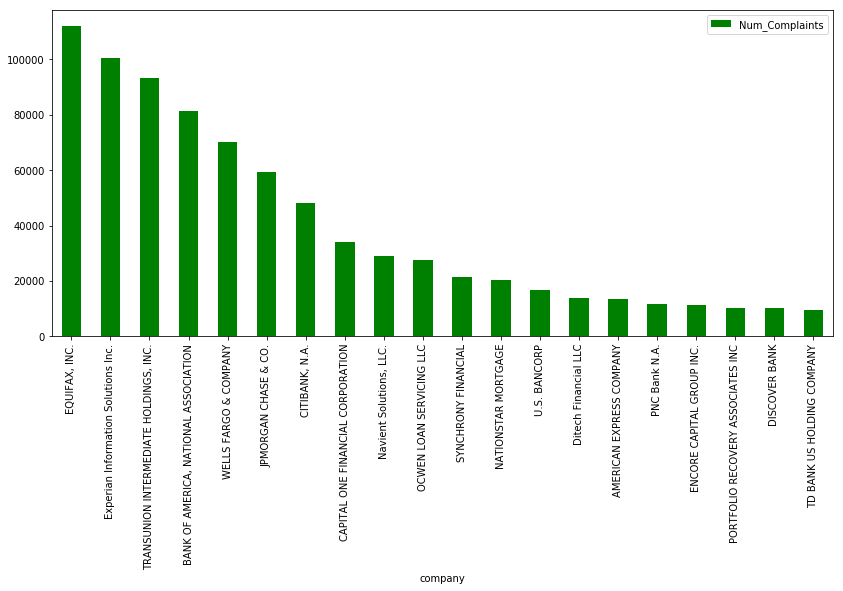

In [21]:
%%local 
%matplotlib inline
import matplotlib as plt 
pd_df1.plot.bar(x='company', y='Num_Complaints', color='green', figsize=(14,6))


In [28]:
equifax_data= data.where("company=='EQUIFAX, INC.'")

In [29]:
equifax_data.groupby('product')\
.agg(func.count(lit(1)).alias("num-complaints"))\
.sort('num-complaints', ascending=False).show(3)

+--------------------+--------------+
|             product|num-complaints|
+--------------------+--------------+
|Credit reporting,...|         62197|
|    Credit reporting|         48128|
|     Debt collection|          1520|
+--------------------+--------------+
only showing top 3 rows

In [69]:
equifax_data.groupby('issue', 'sub_issue')\
.agg(func.count(lit(1)).alias("num-complaints"))\
.sort('num-complaints', ascending=False).show(3, False)

+--------------------------------------+-----------------------------------+--------------+
|issue                                 |sub_issue                          |num-complaints|
+--------------------------------------+-----------------------------------+--------------+
|Incorrect information on your report  |Information belongs to someone else|15996         |
|Incorrect information on credit report|Account status                     |12037         |
|Incorrect information on credit report|Information is not mine            |11017         |
+--------------------------------------+-----------------------------------+--------------+
only showing top 3 rows

### 2. Complaints trend by State and ZipCode

In [30]:
data_filtered = data.where("zip_code != 'NoRecord' and state != 'NoRecord'")

In [31]:
data_filtered.groupby("state").agg(func.count(lit(1)).alias("Num_Complaints"))\
.sort('Num_Complaints', ascending= False).show(5, False)

+-----+--------------+
|state|Num_Complaints|
+-----+--------------+
|CA   |166694        |
|FL   |115219        |
|TX   |98578         |
|NY   |78760         |
|GA   |62062         |
+-----+--------------+
only showing top 5 rows

##### Creating a visualization

In [32]:
df2 = data_filtered.groupby("state").agg(func.count(lit(1)).alias("Num_Complaints")).sort('state')
df2.createOrReplaceTempView("df2")


In [33]:
%%sql -q -n 100 -o pd_df2
SELECT * FROM df2

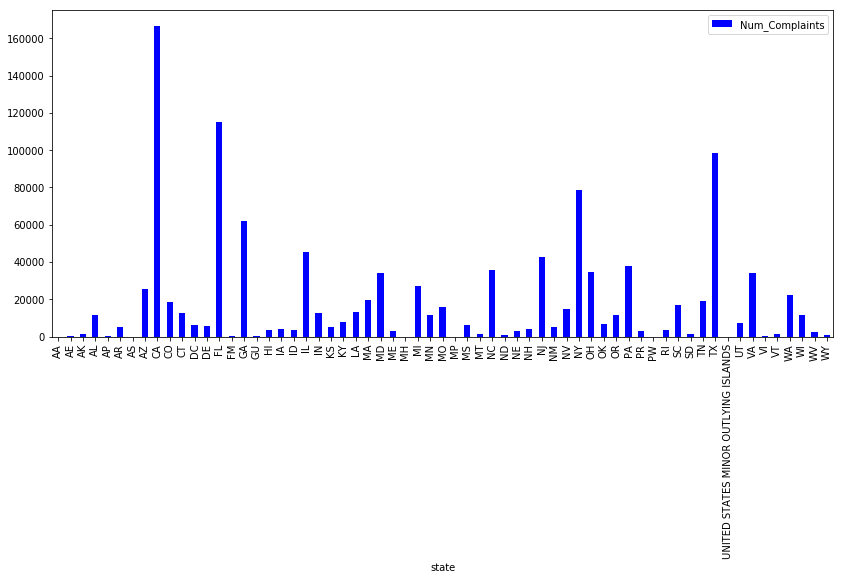

In [35]:
%%local 
%matplotlib inline
import matplotlib as plt 
pd_df2.plot.bar(x='state', y='Num_Complaints', color='blue', figsize=(14,6))

#### Now, we know that States like CA, FL, and TX have more complaints, lets deep dive into these 3 at a zip_code level

In [36]:
top = ['CA','FL','TX']

for item in top:
    print("Number of complaints by Zipcode in "+item+" ")
    data_filtered.filter(data_filtered['state']==item)\
    .groupby("zip_code")\
    .agg(func.count(lit(1)).alias("Num_Complaints"))\
    .sort('Num_Complaints', ascending=False)\
    .show(5, False)

Number of complaints by Zipcode in CA 
+--------+--------------+
|zip_code|Num_Complaints|
+--------+--------------+
|945XX   |4059          |
|900XX   |4012          |
|926XX   |2646          |
|917XX   |2306          |
|921XX   |2288          |
+--------+--------------+
only showing top 5 rows

Number of complaints by Zipcode in FL 
+--------+--------------+
|zip_code|Num_Complaints|
+--------+--------------+
|330XX   |5228          |
|331XX   |5156          |
|334XX   |4435          |
|333XX   |3280          |
|322XX   |2523          |
+--------+--------------+
only showing top 5 rows

Number of complaints by Zipcode in TX 
+--------+--------------+
|zip_code|Num_Complaints|
+--------+--------------+
|770XX   |5801          |
|750XX   |4812          |
|752XX   |2691          |
|760XX   |2279          |
|774XX   |2226          |
+--------+--------------+
only showing top 5 rows

### 3. Complaints on Product 

1. In a consumer complaint dataset, issues and complaints are based on products. 
2. At a product level, Mortgage, Debt Collection and Credit Card seems to occupy major pecentage of the complaints. 
3. We investigate each of these top 3 products in detail and identify potential issues. 

In [38]:
data.groupby("product")\
.agg(func.count(lit(1)).alias("Num_complaints"))\
.sort('Num_Complaints', ascending=False).show(5, False)

+----------------------------------------------------------------------------+--------------+
|product                                                                     |Num_complaints|
+----------------------------------------------------------------------------+--------------+
|Mortgage                                                                    |275730        |
|Debt collection                                                             |240429        |
|Credit reporting, credit repair services, or other personal consumer reports|213842        |
|Credit reporting                                                            |140432        |
|Credit card                                                                 |89190         |
+----------------------------------------------------------------------------+--------------+
only showing top 5 rows

In [74]:
top = ['Mortgage','Debt collection','Credit card']

for item in top:
    print("Top issues in "+item+" ")
    data.filter(data['product']==item)\
    .groupby("issue")\
    .agg(func.count(lit(1)).alias("Num_Complaints"))\
    .sort('Num_Complaints', ascending=False)\
    .show(5, False)

Top issues in Mortgage 
+----------------------------------------+--------------+
|issue                                   |Num_Complaints|
+----------------------------------------+--------------+
|Loan modification,collection,foreclosure|112311        |
|Loan servicing, payments, escrow account|77333         |
|Trouble during payment process          |21861         |
|Struggling to pay mortgage              |17970         |
|Application, originator, mortgage broker|17229         |
+----------------------------------------+--------------+
only showing top 5 rows

Top issues in Debt collection 
+-------------------------------------+--------------+
|issue                                |Num_Complaints|
+-------------------------------------+--------------+
|Cont'd attempts collect debt not owed|60687         |
|Attempts to collect debt not owed    |40842         |
|Communication tactics                |34912         |
|Disclosure verification of debt      |30800         |
|Written noti

### 4. Which source of submission receives timely response

1. Generate Boolean Columns for all submitted_via values 
2. Filter data based on records with timely_response as Yes 
3. Count number of complaints in each source and find the most efficient source of complaint response 
4. It can be seen that Web receives maximum complaints (900k+), thus ignoring web, referral seems to be a promising source for getting a timely response from companies. 

In [71]:
data.select('submitted_via').distinct().show()

+-------------+
|submitted_via|
+-------------+
|        Phone|
|          Fax|
|        Email|
|     Referral|
|  Postal mail|
|          Web|
+-------------+

In [72]:
data = data.withColumn("is_phone", expr("submitted_via == 'Phone'"))
data = data.withColumn("is_fax", expr("submitted_via == 'Fax'"))
data = data.withColumn("is_email", expr("submitted_via == 'Email'"))
data = data.withColumn("is_referral", expr("submitted_via == 'Referral'"))
data = data.withColumn("is_postalmail", expr("submitted_via == 'Postal mail'"))
data = data.withColumn("is_web", expr("submitted_via == 'Web'"))

In [73]:
data_timely = data.where("timely_response = 'Yes'")

In [74]:
data_timely\
.groupby("company")\
.agg(sum(data_timely['is_phone'].cast(IntegerType())).alias("phone"),
     sum(data_timely['is_fax'].cast(IntegerType())).alias("fax"),
     sum(data_timely['is_email'].cast(IntegerType())).alias("email"),
     sum(data_timely['is_referral'].cast(IntegerType())).alias("referral"),
     sum(data_timely['is_postalmail'].cast(IntegerType())).alias("postalmail"),
     sum(data_timely['is_web'].cast(IntegerType())).alias("web"))\
.sort('phone','fax','email','referral',
      'postalmail','web', ascending=False).show(5)

+--------------------+-----+----+-----+--------+----------+-----+
|             company|phone| fax|email|referral|postalmail|  web|
+--------------------+-----+----+-----+--------+----------+-----+
|BANK OF AMERICA, ...| 6171|1301|   44|   24934|      4224|43089|
|WELLS FARGO & COM...| 6072|1195|   31|   19312|      3450|36820|
|JPMORGAN CHASE & CO.| 4574| 923|   25|   16020|      3033|34661|
|      CITIBANK, N.A.| 3317| 619|   14|    7627|      2868|33519|
|Experian Informat...| 3176|1975|   17|    4394|      8802|82213|
+--------------------+-----+----+-----+--------+----------+-----+
only showing top 5 rows

##### Visualization

In [36]:
data.createOrReplaceTempView("CustData")
df4 = spark.sql("select submitted_via, count(complaint_id) as Num_Complaints from CustData group by submitted_via")
df4.show()

+-------------+--------------+
|submitted_via|Num_Complaints|
+-------------+--------------+
|        Phone|         74956|
|          Fax|         18659|
|        Email|           382|
|     Referral|        171390|
|  Postal mail|         66734|
|          Web|        924431|
+-------------+--------------+

In [37]:
df4.createOrReplaceTempView("df4")

In [38]:
%%sql -q -n 100 -o pd_df4
SELECT * FROM df4

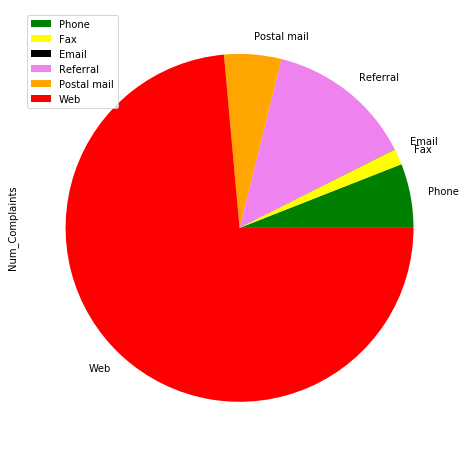

In [118]:
%%local 
%matplotlib inline
import matplotlib as plt 
ax = pd_df4.plot.pie(labels=pd_df4['submitted_via'], y='Num_Complaints', 
                colors=['green', 'yellow', 'black', 'violet', 'orange', 'red'], figsize=(15,8))
ax.legend(loc="upper left")

### 5. Do people who earn less file more complaints ? 

1. Its a well known fact that, majority of people who earn less (middle class) tend to file more complaints. 
2. Its seen from the data (after ignoring 0's) that the Tot_Mean_Income_distribution ranges from 35k to 19million(USD)
3. To test the hypothesis, Tot_Mean_Income was split into buckets (50k, 100k, 150k, and 200k) 
4. And Number of complaints from each bucket was found. 

#### Result - 
- Its clear that majority of complaints (600+) comes from the people with middle class income. (50-100k). This could also be due to the fact that more number of people exist in that bucket. 

In [16]:
data.select('Tot_Mean_Income').describe().show()

+-------+-----------------+
|summary|  Tot_Mean_Income|
+-------+-----------------+
|  count|          1256552|
|   mean|5298669.044306165|
| stddev|4801526.808827681|
|    min|                0|
|    max|           993821|
+-------+-----------------+

In [17]:
data_2 = data.filter("Tot_Mean_Income != 0")
data_2 = data_2.withColumn("Tot_Mean_Income_int", data_2['Tot_Mean_Income'].cast(IntegerType()))
data_2.select('Tot_Mean_Income_int').describe().show()

+-------+-------------------+
|summary|Tot_Mean_Income_int|
+-------+-------------------+
|  count|            1049566|
|   mean|   6343625.06498972|
| stddev|  4579572.236572872|
|    min|              35339|
|    max|           19118905|
+-------+-------------------+

In [18]:
data_2 = data_2.withColumn("Less50k", expr("Tot_Mean_Income_int < 50000"))
data_2 = data_2.withColumn("Bet50to100k", expr("Tot_Mean_Income_int >= 50000 AND Tot_Mean_Income_int < 100000"))
data_2 = data_2.withColumn("Bet100to150k", expr("Tot_Mean_Income_int >= 100000 AND Tot_Mean_Income_int <150000"))
data_2 = data_2.withColumn("Bet150to200k", expr("Tot_Mean_Income_int >= 150000 AND Tot_Mean_Income_int <200000"))

In [19]:
items = ['Less50k','Bet50to100k','Bet100to150k','Bet150to200k']
for item in items: 
    cnt = data_2.where(item).count()
    print("Number of complaints in "+item+" population: "+str(cnt))

Number of complaints in Less50k population: 13
Number of complaints in Bet50to100k population: 644
Number of complaints in Bet100to150k population: 80
Number of complaints in Bet150to200k population: 283

### 6. Where companies fail to provide timely response 

1. Issue - One of the most common cause of issue that fails to provide a timely response is in the field of debt collection. The issues range from communication tactics, loan modification etc

2. Companies: 

    - Bank of America : struggles to provide timely response for Mortgage 
    - Wells Fargo :  struggles to provide response in the banking services
    - EquiFax, INC - struggles in the credit reporting segment 

In [96]:
data_notimely= data.where("timely_response=='No'")

In [97]:
data_notimely.groupby('issue')\
.agg(func.count(lit(1)).alias('Num_complaints'))\
.sort('Num_complaints', ascending=False)\
.show(5, False)

+----------------------------------------+--------------+
|issue                                   |Num_complaints|
+----------------------------------------+--------------+
|Cont'd attempts collect debt not owed   |4131          |
|Communication tactics                   |2452          |
|Loan modification,collection,foreclosure|2155          |
|Disclosure verification of debt         |2035          |
|Incorrect information on your report    |1734          |
+----------------------------------------+--------------+
only showing top 5 rows

In [98]:
data_notimely.groupby('company', 'product')\
.agg(func.count(lit(1)).alias('Num_complaints'))\
.sort('Num_complaints', ascending=False)\
.show(3)

+--------------------+--------------------+--------------+
|             company|             product|Num_complaints|
+--------------------+--------------------+--------------+
|WELLS FARGO & COM...|Bank account or s...|          1530|
|       EQUIFAX, INC.|Credit reporting,...|          1512|
|BANK OF AMERICA, ...|            Mortgage|          1173|
+--------------------+--------------------+--------------+
only showing top 3 rows



### 7. Education's Correlation with Complaints. 

1. We have from the education data - Number of students (passed 12th grade), and states' local revenue 
2. It can be seen that increase in education and local revenue seems to increase the number of complaints. 
3. This points to indicate that complaints are not silly and more educated people are affected by it. 



In [104]:
data = data.withColumn('NumStudents', data.NumStudents.cast(DecimalType(18, 2)))
data = data.withColumn('Tot_State_Educ_Revenue', data.Tot_State_Educ_Revenue.cast(DecimalType(18, 2)))
data = data.withColumn('complaint_id', data.complaint_id.cast(IntegerType()))

In [105]:
data_educ = data.where("Tot_State_Educ_Revenue != 0")

In [106]:
data_educ.groupby('state')\
.agg(first("Tot_State_Educ_Revenue").alias('States-Educ_Revenue'),
     first("NumStudents").alias("NumberOfStudents"),
    func.count(func.lit(1)).alias("num_complaints"))\
.sort('States-Educ_Revenue','NumberOfStudents', ascending=False).show()

+-----+-------------------+----------------+--------------+
|state|States-Educ_Revenue|NumberOfStudents|num_complaints|
+-----+-------------------+----------------+--------------+
|   CA|       774232107.00|    127943053.00|        172954|
|   NY|       446777506.00|     59646734.00|         84384|
|   TX|       362816451.00|     97652535.00|        105251|
|   MI|       232956123.00|     35882600.00|         29754|
|   FL|       218933074.00|     55298947.00|        123289|
|   NJ|       196224231.00|     27870060.00|         46988|
|   PA|       188960285.00|     39643588.00|         43325|
|   OH|       188741219.00|     40008831.00|         37720|
|   IL|       179809932.00|     45100706.00|         48653|
|   NC|       154477379.00|     30015324.00|         38794|
|   GA|       153062090.00|     33651759.00|         65512|
|   WA|       144118417.00|     22506488.00|         24012|
|   MN|       130631274.00|     18710320.00|         13142|
|   IN|       129311835.00|     22473056

### 8. Does Delay in sending complaints affect timely response 

1. In our dataset, date received indicates the date complaint was received and the data_sent_to_company is when the complaint was forwarded. 
2. This could be a reason as to why companies couldn't provide timely response
3. Upon investigation, it is clear that though there was significant delay in receiving complaints, top tier companies like Equifax,Bank of the west, American Express etc could provide timely response irrespectively. 
4. However, smaller firms like Phillips Reinhar, Clayton Holdings has failed to provide timely_response. 

In [182]:
data = data.withColumn("date_received", to_date(unix_timestamp(col("date_received"), "M/dd/yyyy").cast("timestamp")))
data = data.withColumn("date_sent_to_company", to_date(unix_timestamp(col("date_sent_to_company"), "M/dd/yyyy").cast("timestamp")))
data = data.withColumn("Delay", datediff(col('date_sent_to_company'), col('date_received')))

In [195]:
data_delay.select('Delay', 'company', 'timely_response')\
.where("timely_response=='No'")\
.sort('Delay', ascending=False).show()

data_delay.select('Delay', 'company', 'timely_response')\
.where("timely_response=='Yes'")\
.sort('Delay', ascending=False).show()

+-----+--------------------+---------------+
|Delay|             company|timely_response|
+-----+--------------------+---------------+
| 1133|SMS Check Recover...|             No|
| 1106|  Westhill Financial|             No|
|  909|Clayton Holdings LLC|             No|
|  832|Advanced Recovery...|             No|
|  643|Elite Financial S...|             No|
|  588|Phillips, Reinhar...|             No|
|  587|Phillips, Reinhar...|             No|
|  585|Phillips, Reinhar...|             No|
|  573|  Kadent Corporation|             No|
|  572|Evans Law Associa...|             No|
|  564|Phillips, Reinhar...|             No|
|  551|Phillips, Reinhar...|             No|
|  536|Phillips, Reinhar...|             No|
|  536|Phillips, Reinhar...|             No|
|  531|Phillips, Reinhar...|             No|
|  525|Phillips, Reinhar...|             No|
+-----+--------------------+---------------+

+-----+--------------------+---------------+
|Delay|             company|timely_response|
+-----+--

### 9. Trend of complaints by Month

1. Once we get Month level data from the table
2. We can clearly see that March month recieves more complaints on average than any other months. 

In [67]:
#Creating a column called Month 

data = data.withColumn("date_sent_to_company", to_date(unix_timestamp(col("date_sent_to_company"), "M/dd/yyyy").cast("timestamp")))
data = data.withColumn("Month", date_format(col("date_sent_to_company"), 'MMMMM'))
data.select("Month").show(5)

+--------+
|   Month|
+--------+
|November|
|November|
|November|
|November|
|November|
+--------+
only showing top 5 rows

In [68]:
df9 = data.groupby("Month")\
.agg(func.count(lit(1)).alias("Num_Complaints"))\
.sort(to_date(col('Month'), 'MMMM'))
df9.show()

+---------+--------------+
|    Month|Num_Complaints|
+---------+--------------+
|  January|        111990|
| February|        111496|
|    March|        125247|
|    April|        100115|
|      May|         98876|
|     June|         98342|
|     July|        102666|
|   August|        106438|
|September|        106341|
|  October|        104961|
| November|         93313|
| December|         96767|
+---------+--------------+

In [87]:
df9.createOrReplaceTempView("df9")

In [88]:
%%sql -q -n 20 -o pd_df9
SELECT * FROM df9

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

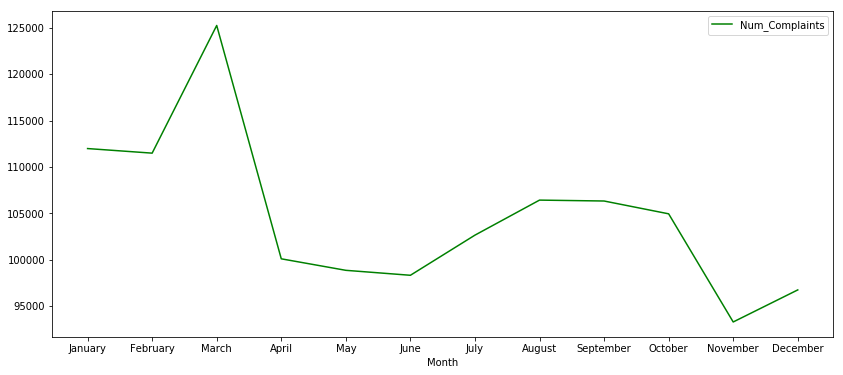

In [92]:
%%local 
%matplotlib inline
import matplotlib as plt 
ax = pd_df9.plot.line(x= 'Month', y='Num_Complaints', color='green', figsize=(14,6))
ax.set_xticks(pd_df9.index)
ax.set_xticklabels(pd_df9.Month)

### 10. Products and complaints

1. Top 3 products with issues are : Mortgage, Credit Reporting and Debt Collection

In [93]:
df10 = data.groupby('product')\
.agg(func.count(lit(1)).alias("Num_Complaints"))

In [94]:
df10.createOrReplaceTempView("df10")

In [95]:
%%sql -q -n 20 -o pd_df10
SELECT * FROM df10

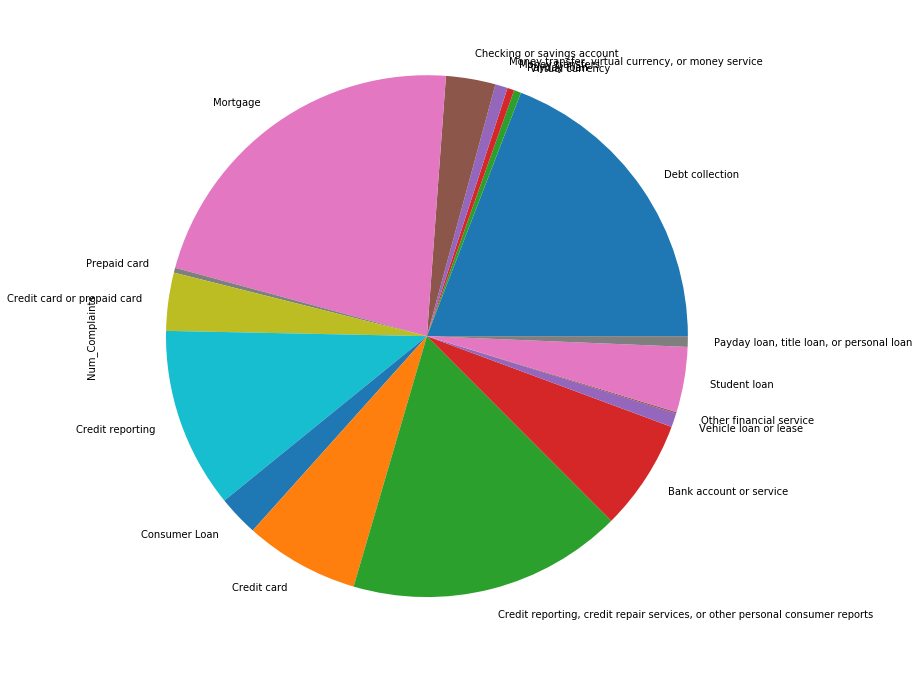

In [113]:
%%local 
%matplotlib inline
import matplotlib as plt 
ax = pd_df10.plot.pie(labels=pd_df10['product'], y='Num_Complaints', figsize=(22,12), legend=False)